## Heading

In [1]:
print("Ola Mundo")

Ola Mundo


In [11]:
a=5
b=2

In [12]:
a**b

25

In [13]:
a//b

2

In [14]:
a/float(b)

2.5

In [15]:
a%b

1

In [16]:
min(a,b)

2

In [17]:
a != b

True

In [18]:
a += 3
a

8

In [25]:
a = [1, "hello", 5.5]

In [26]:
a

[1, 'hello', 5.5]

In [27]:
len(a)

3

In [28]:
a[0] # First element index is 0 

1

In [29]:
a.append("how are you?")
a

[1, 'hello', 5.5, 'how are you?']

In [30]:
a.pop(1)

'hello'

In [31]:
a

[1, 5.5, 'how are you?']

In [32]:
for x in a:
    print(x)
    print(a)

1
[1, 5.5, 'how are you?']
5.5
[1, 5.5, 'how are you?']
how are you?
[1, 5.5, 'how are you?']


In [33]:
for i,x in enumerate(a):
    print("element {}: {}".format(i, x))

element 0: 1
element 1: 5.5
element 2: how are you?


In [34]:
a[0] = 10
a

[10, 5.5, 'how are you?']

In [35]:
b = (-1, "ola", 2.5) # Python Tuple 

In [36]:
b[1] = "Goodbye"

TypeError: 'tuple' object does not support item assignment

In [37]:
x,y,z = b
y

'ola'

In [38]:
a = {"name":"Mary", "age":23, "sign":"capricorn"} # Python Dictionary

In [39]:
a["name"]

'Mary'

In [40]:
a["job"] = "student"
a


{'name': 'Mary', 'age': 23, 'sign': 'capricorn', 'job': 'student'}

## Python Functions

In [1]:
def func2(a, b=4, c=5):
    if ( a > 2 and b < 10):
        return a
    elif c == 5:
        return b
    else:
        return a + b +c

In [2]:
func2(4,c=6, b = 11)

21

In [1]:
# Numpy Module
import numpy as np

In [2]:
a = np.array([0, 2, 4, 6, 8, 10, 12,14,16])
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [3]:
a.shape

(9,)

In [4]:
a[::-1]

array([16, 14, 12, 10,  8,  6,  4,  2,  0])

In [5]:
a=np.array([[0, 1, 2, 3], [4,5,6,7],[8, 9, 10, 11]])
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
a.shape

(3, 4)

In [7]:
a[:,0:2]

array([[0, 1],
       [4, 5],
       [8, 9]])

In [8]:
a.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [9]:
np.mean(a)

5.5

In [10]:
a.mean(axis=0)

array([4., 5., 6., 7.])

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
x=np.linspace(-5,5, 50)
y = np.sin(x)
y2 = y ** 2
y3  = -x / 5.0

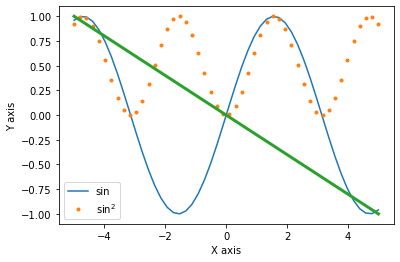

In [14]:
plt.figure()
plt.plot(x,y,label='sin')
plt.plot(x,y2, '.', label='$\sin^{2}$')
plt.plot(x,y3,linewidth=3)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.show()

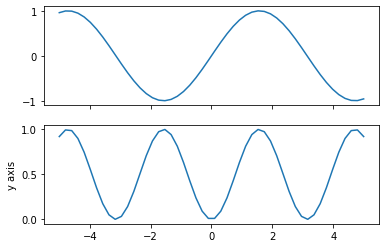

In [15]:
fig, ax = plt.subplots(2, sharex = True)
ax[0].plot(x,y)
ax[1].plot(x,y2)
ax[1].set_ylabel('y axis')
plt.show()

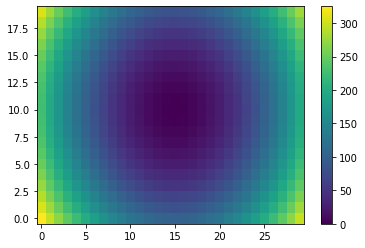

In [16]:
y,x = np.mgrid[0:20, 0:30]
z = (x-15)**2 + (y-10) **2
plt.figure()
plt.pcolormesh(x,y,z)
plt.colorbar()
plt.show()

In [17]:
# SciPy
from scipy.optimize import curve_fit
def f(x,a,b,c):
    return a * np.exp(-b * x ) +c
n=60
x = np.linspace(0,5, n)
yclean = f(x, 5, 2, 0.5)
y = yclean + 0.5 * np.random.randn(n)


In [18]:
popt, pcov = curve_fit (f, x, y)
perr = np.sqrt(np.diag(pcov))
y_fit = f(x, *popt)
msd = np.sum((y-y_fit) ** 2)/n

In [19]:
print(['{} +/- {}'.format(popt[i],perr[i]) for i in range(3)])
print(msd)

['5.025964511529936 +/- 0.30857527041360644', '2.0044165943204657 +/- 0.21694811542880396', '0.5187271034119937 +/- 0.07265219883233438']
0.18259723338244957


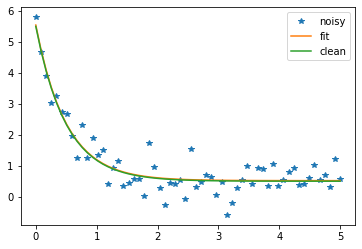

In [20]:
plt.plot(x,y,'*',label='noisy')
plt.plot(x,y_fit,label='fit')
plt.plot(x,yclean,label='clean')
plt.legend(loc='best')
plt.show()

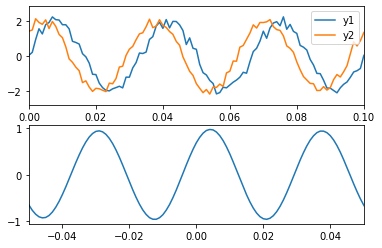

In [33]:
import math
from scipy import signal
pi=math.pi

n=1000
sfreq=1e3 #sampling frequency
dt=1/sfreq  #sampling time
t=np.arange(0,n)*dt
f1=30.0  #in Hz
y1 = 2.0*np.sin(2.0*pi*f1*t) + 0.2*np.random.randn(n)
y2 = 2.0*np.sin(2.0*pi*f1*t+pi/4.0) + 0.2*np.random.randn(n)
corr = signal.correlate(y1, y2,mode='same')/np.linalg.norm(y1)/np.linalg.norm(y2)
lags = signal.correlation_lags(len(y1), len(y2),mode='same')*dt
fig, ax = plt.subplots(2)
ax[0].plot(t,y1,label='y1')
ax[0].plot(t,y2,label='y2')
ax[0].set_xlim([0,0.1])
ax[0].legend(loc='best')
ax[1].plot(lags,corr,label='corr')
ax[1].set_xlim([-0.05,0.05])
plt.show()

In [34]:
print(np.argmax(corr))
print(corr[np.argmax(corr)])
print(lags[np.argmax(corr)])

504
0.9781159499987778
0.004
